# Customer Segmentation

Aim is to separate customers into groups that reflect similarities among customers in each cluster.

Data Source: Kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)

Data contains following features:

* People

  * ID: Customer's unique identifier
  * Year_Birth: Customer's birth year
  * Education: Customer's education level
  * Marital_Status: Customer's marital status
  * Income: Customer's yearly household income
  * Kidhome: Number of children in customer's household
  * Teenhome: Number of teenagers in customer's household
  * Dt_Customer: Date of customer's enrollment with the company
  * Recency: Number of days since customer's last purchase
  * Complain: 1 if the customer complained in the last 2 years, 0 otherwise

* Products

  * MntWines: Amount spent on wine in last 2 years
  * MntFruits: Amount spent on fruits in last 2 years
  * MntMeatProducts: Amount spent on meat in last 2 years
  * MntFishProducts: Amount spent on fish in last 2 years
  * MntSweetProducts: Amount spent on sweets in last 2 years
  * MntGoldProds: Amount spent on gold in last 2 years

* Promotion

  * NumDealsPurchases: Number of purchases made with a discount
  * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

  * NumWebPurchases: Number of purchases made through the company’s website
  * NumCatalogPurchases: Number of purchases made using a catalogue
  * NumStorePurchases: Number of purchases made directly in stores
  * NumWebVisitsMonth: Number of visits to company’s website in the last month


## Import libraries and load the data

In [350]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [351]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:

path = '/content/drive/MyDrive/CS6220 DMT/data/'
data = pd.read_csv(path + "marketing_campaign.csv", sep='\t')
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


## Exploratory Data Analysis and Preprocessing

In [353]:
data.shape

(2240, 29)

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

dt_customer to datetime

sum expenses and accepted campaigns

categorical feats - one hot encoding before passing to model

In [355]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [356]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [357]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income has 24 missing values - impute with means

In [358]:
def cleaned_marital_stat(s:str):
  if s in ['Single', 'YOLO', 'Alone', 'Divorced', 'Widow', 'Absurd']:
    return 0
  else:
    return 1

data['Marital_Status'] = data['Marital_Status'].apply(cleaned_marital_stat)

In [359]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

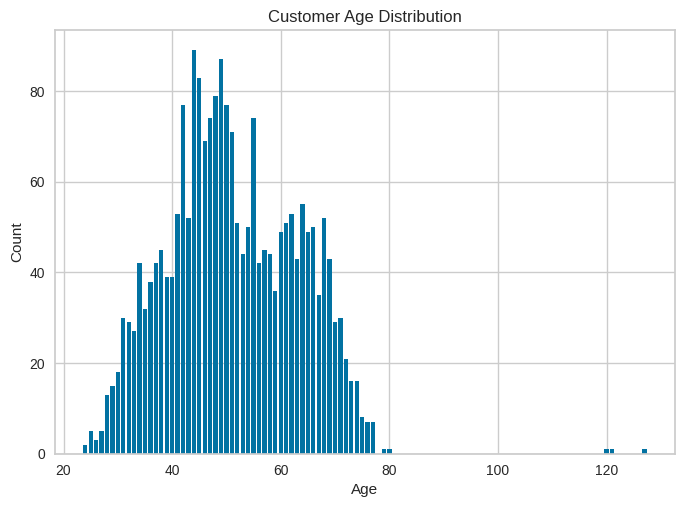

In [360]:
#this data was not updated since 2 years.

data['Age'] = 2020 - data['Year_Birth']
ages_count = data['Age'].value_counts()

x = list(ages_count.keys())
y = list(ages_count)

plt.bar(x,y)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

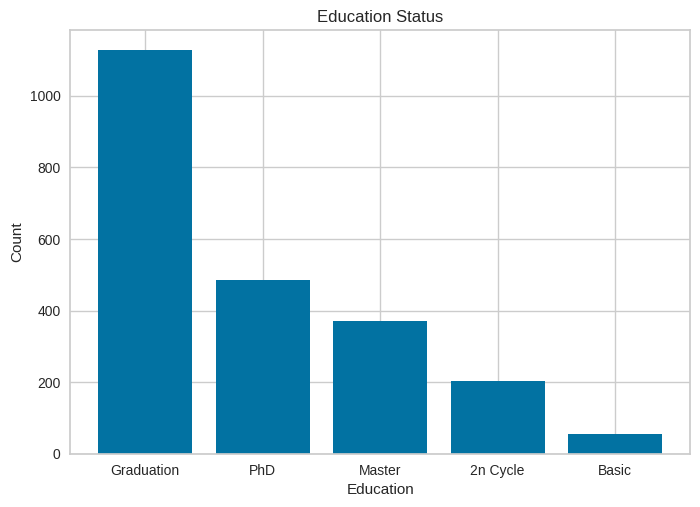

In [361]:
x = list(data['Education'].value_counts().keys())
y = list(data['Education'].value_counts())

plt.bar(x,y)
plt.title('Education Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Mostly graduate level educated customers.

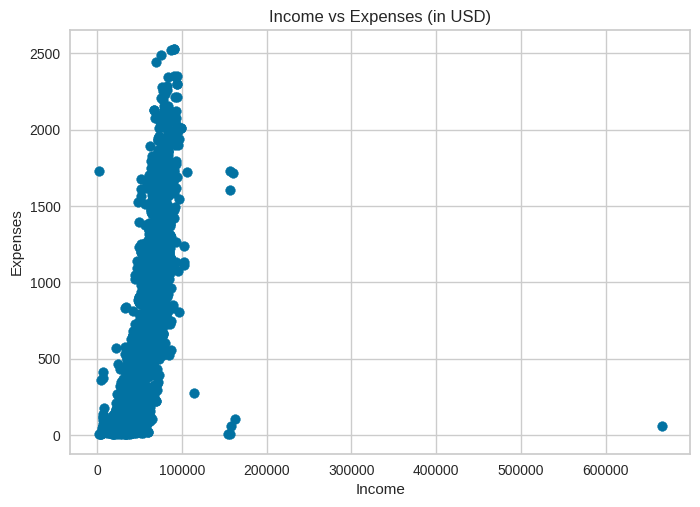

In [362]:
total_expenses = data['MntWines'] + data['MntFruits'] + data['MntGoldProds'] + data['MntFishProducts'] + data['MntMeatProducts'] + data['MntSweetProducts']
plt.scatter(data['Income'], total_expenses)
plt.title('Income vs Expenses (in USD)')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()



We can see some outliers. Removing the customer with very high income to get a closer look at the general spending power of customers. 

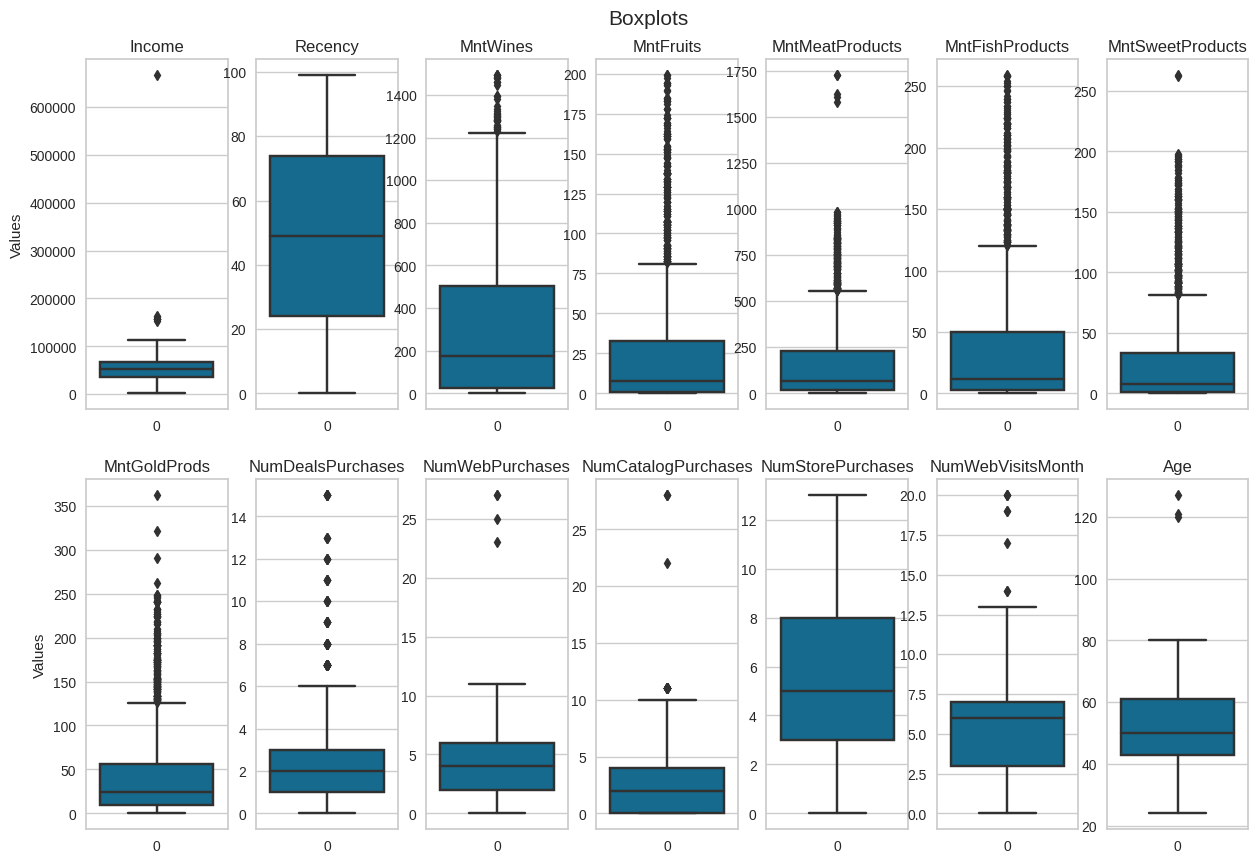

In [363]:
# looking at outliers for all numeric columns
numeric_columns = ['Income','Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age']

fig, axs = plt.subplots(2, 7,  figsize=(15,10))
fig.suptitle('Boxplots', y=0.93, size=15)
axs = axs.flatten()
for i, cols  in enumerate(numeric_columns):
        if i % 7 == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data = data[cols], orient='v', ax=axs[i])
        axs[i].set_title(cols)


In [364]:
cols_to_filter = ['Income','MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumWebVisitsMonth','Age']
Q1 = data[cols_to_filter].quantile(0.0)
Q3 = data[cols_to_filter].quantile(0.90)
IQR = Q3 - Q1
filtered = data[~((data[cols_to_filter] < (Q1 - 1.5 * IQR)) | (data[cols_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(data.shape)
display(filtered.shape)

(2240, 30)

(2223, 30)

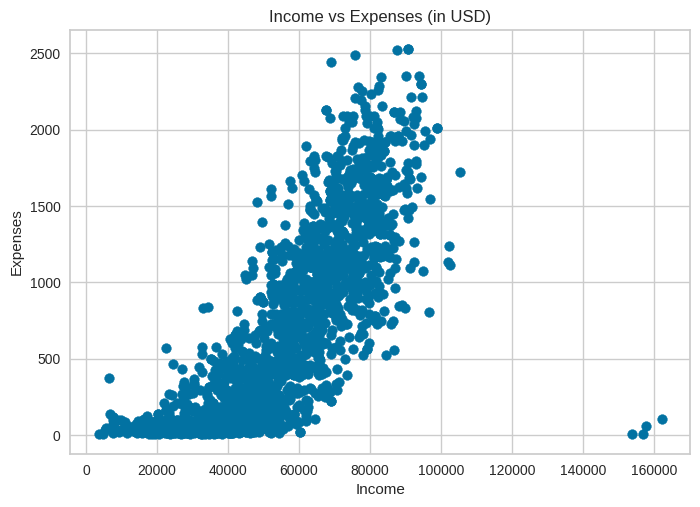

In [365]:
total_expenses = filtered['MntWines'] + filtered['MntFruits'] + filtered['MntGoldProds'] + filtered['MntFishProducts'] + filtered['MntMeatProducts'] + filtered['MntSweetProducts']

plt.scatter(filtered['Income'], total_expenses)
plt.title('Income vs Expenses (in USD)')
plt.xlabel('Income')
plt.ylabel('Expenses')
plt.show()

<ipython-input-366-57dd70b0f8be>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



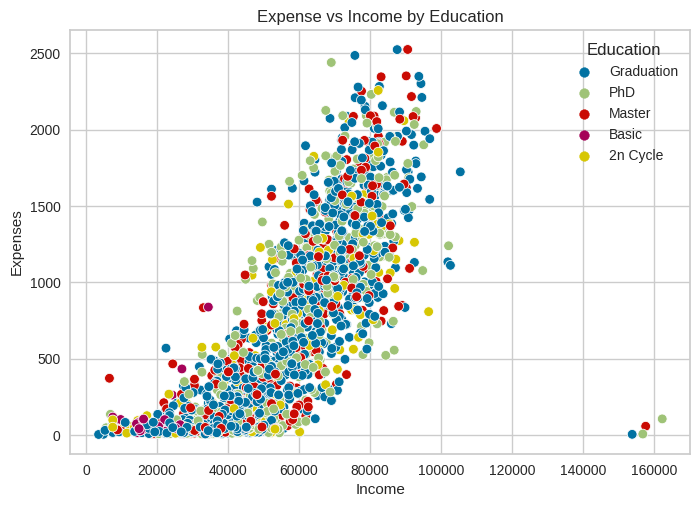

In [366]:
import seaborn as sns

filtered['Expenses'] = filtered['MntWines'] + filtered['MntFruits'] + filtered['MntGoldProds'] + filtered['MntFishProducts'] + filtered['MntMeatProducts'] + filtered['MntSweetProducts']

sns.scatterplot(x='Income', y='Expenses', data=filtered, hue='Education')
plt.title('Expense vs Income by Education')
plt.show();

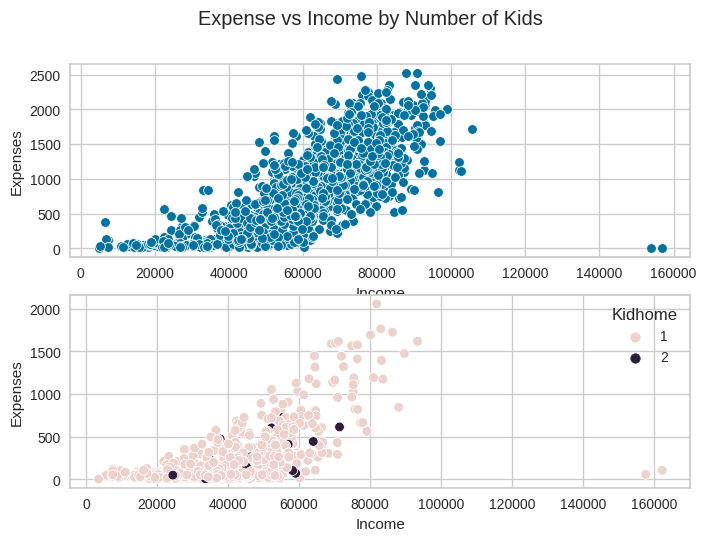

In [367]:
fig, axs = plt.subplots(2)
fig.suptitle('Expense vs Income by Number of Kids')
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Kidhome'] == 0], ax =axs[0])
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Kidhome'] > 0], hue='Kidhome', ax =axs[1])
plt.xticks(np.arange(0, max(filtered['Income']), 20000));

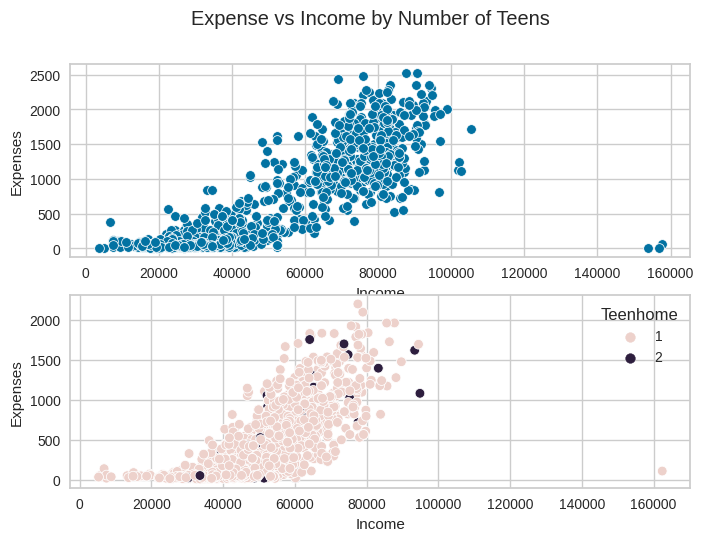

In [368]:
fig, axs = plt.subplots(2)
fig.suptitle('Expense vs Income by Number of Teens')
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Teenhome'] == 0], ax =axs[0])
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Teenhome'] > 0], hue='Teenhome', ax =axs[1])
plt.xticks(np.arange(0, max(filtered['Income']), 20000));

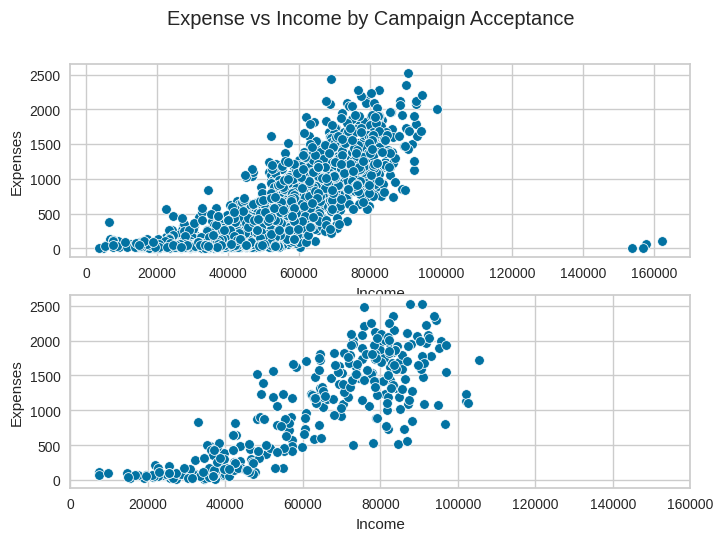

In [369]:
fig, axs = plt.subplots(2)
fig.suptitle('Expense vs Income by Campaign Acceptance')
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Response'] == 0], ax =axs[0])
sns.scatterplot(x='Income', y='Expenses', data=filtered[filtered['Response'] == 1], ax =axs[1])
plt.xticks(np.arange(0, max(filtered['Income']), 20000));

## Feature Engineering and Clustering

1. One hot encoding for categorical variables.
2. StandardScaler to standardize features by removing the mean and scaling to unit variance.
3. PCA to reduce feature dimentions,
4. Elbow Method to determine the number of clusters in a data set.
5. K Means Clustering and Analysis of clusters

In [370]:
one_hot_encoded = pd.get_dummies(filtered['Education'])
filtered = pd.concat([filtered, one_hot_encoded], axis=1)
filtered.drop(columns=['Education'], inplace = True)

filtered.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Z_CostContact,Z_Revenue,Response,Age,Expenses,2n Cycle,Basic,Graduation,Master,PhD
0,5524,1957,0,58138.0,0,0,04-09-2012,58,635,88,...,3,11,1,63,1617,0,0,1,0,0
1,2174,1954,0,46344.0,1,1,08-03-2014,38,11,1,...,3,11,0,66,27,0,0,1,0,0
2,4141,1965,1,71613.0,0,0,21-08-2013,26,426,49,...,3,11,0,55,776,0,0,1,0,0
3,6182,1984,1,26646.0,1,0,10-02-2014,26,11,4,...,3,11,0,36,53,0,0,1,0,0
4,5324,1981,1,58293.0,1,0,19-01-2014,94,173,43,...,3,11,0,39,422,0,0,0,0,1


In [371]:
filtered.drop(columns=['ID','Dt_Customer', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Z_CostContact', 'Z_Revenue'], inplace = True)

In [372]:
from sklearn.preprocessing import StandardScaler
ds = filtered.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [373]:
scaled_ds.columns

Index(['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Expenses', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD'],
      dtype='object')

In [374]:
feats = scaled_ds.columns

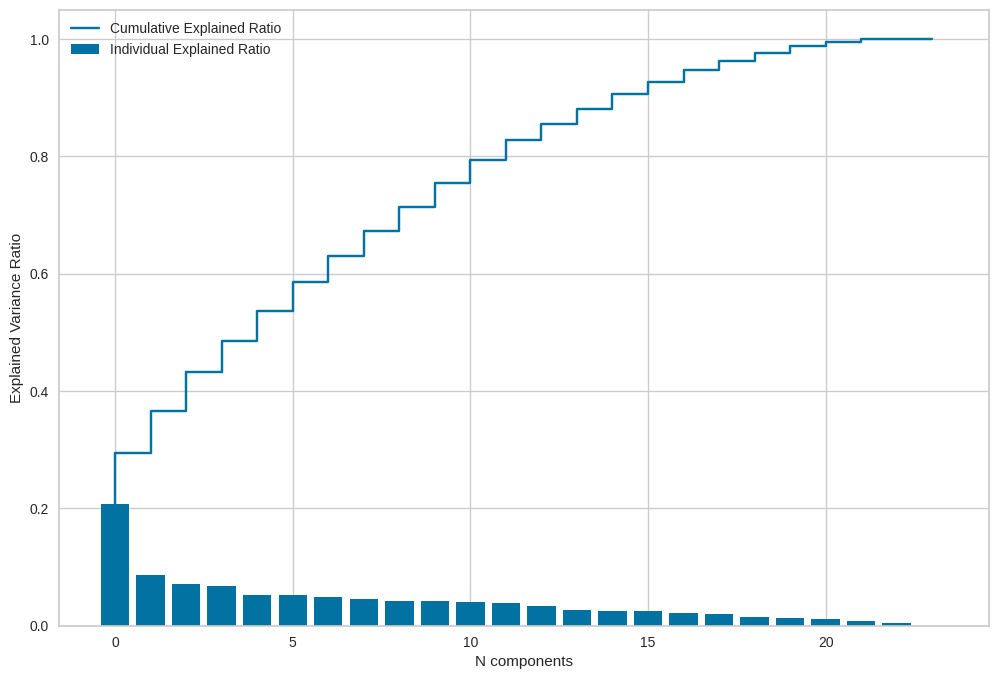

In [375]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_ds.values)


cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 8))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()


In [376]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_ds[feats])
pca_df = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2","x3"])
pca_df.describe()

,x1,x2,x3
count,2.223000e+03,2.223000e+03,2.223000e+03
mean,-1.150676e-16,-4.155221e-17,8.949706e-17
std,2.234104e+00,1.438928e+00,1.310831e+00
min,-4.508511e+00,-4.640190e+00,-2.858161e+00
25%,-2.014846e+00,-1.020659e+00,-8.451936e-01
50%,-4.214656e-01,2.619465e-02,-1.771026e-01
75%,1.725714e+00,1.043989e+00,6.583976e-01
max,7.138124e+00,5.287325e+00,6.008903e+00


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

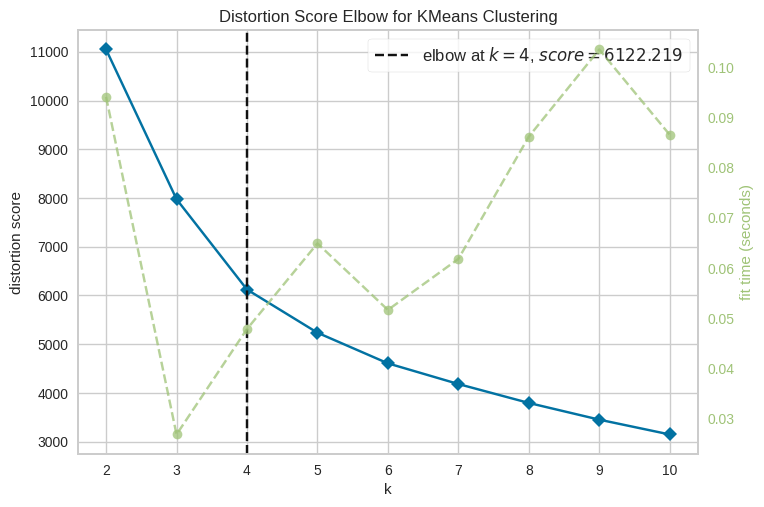

In [377]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=42)
elbow_plot = KElbowVisualizer(kmeans, k=10)
elbow_plot.fit(pca_df)
elbow_plot.show();

In [378]:
kmeans = KMeans(n_clusters=4, random_state=42)
predictions = kmeans.fit_predict(pca_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [379]:
import plotly.express as px
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(pca_df, x="x1", y="x2", z="x3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
fig.show()

In [380]:
ds['Clusters'] = predictions

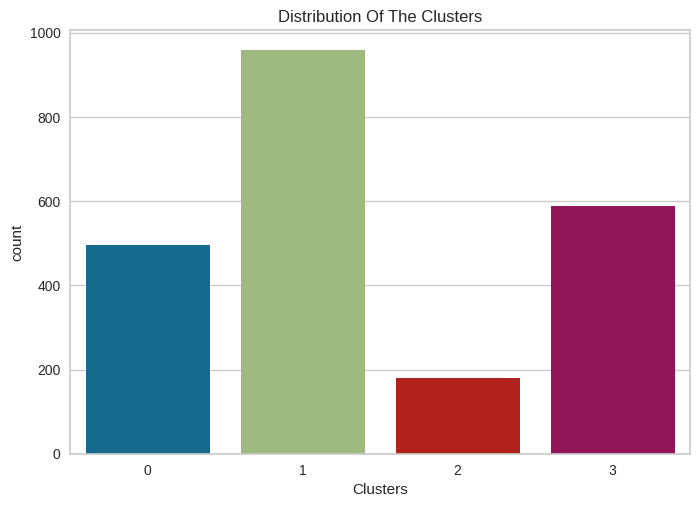

In [381]:
pl = sns.countplot(x=ds["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

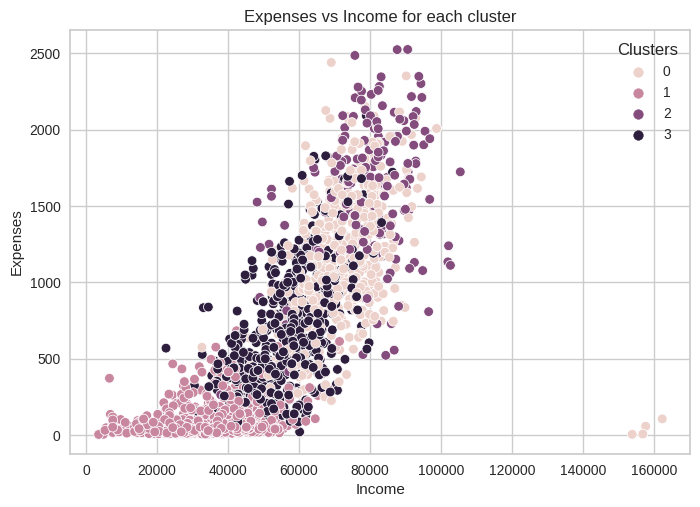

In [382]:
sns.scatterplot(x='Income', y='Expenses', data=ds, hue='Clusters')
plt.title("Expenses vs Income for each cluster")
plt.show();


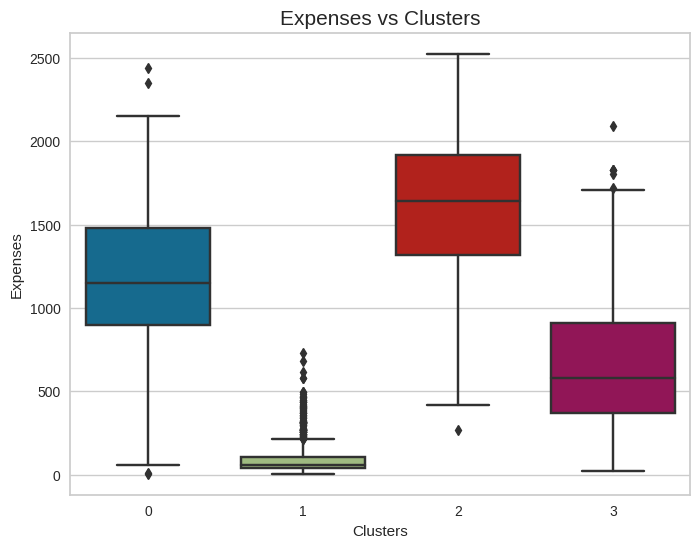

In [383]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["Expenses"])
plt.title("Expenses vs Clusters", size=15)
plt.show()

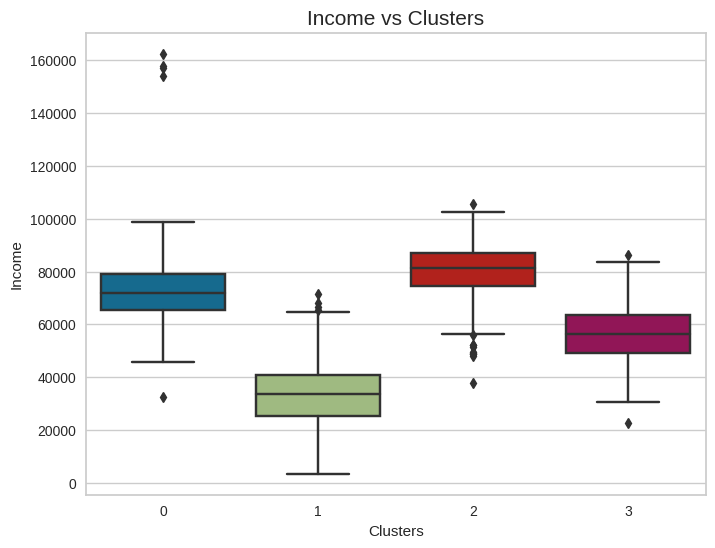

In [384]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()

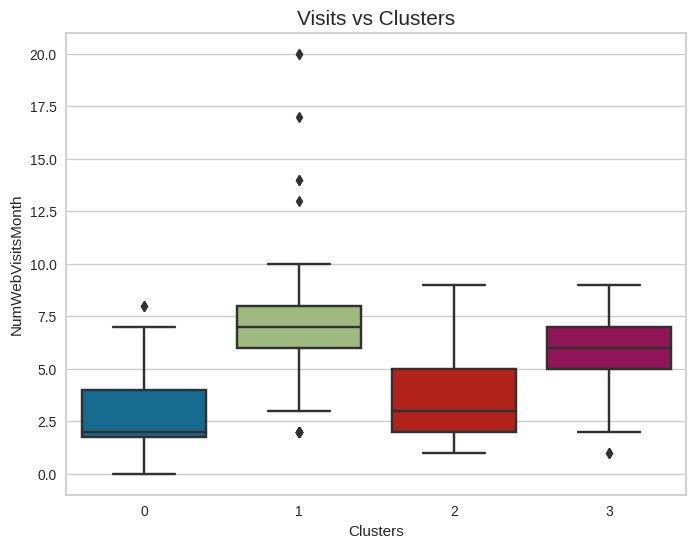

In [385]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["NumWebVisitsMonth"])
plt.title("Visits vs Clusters", size=15)
plt.show()

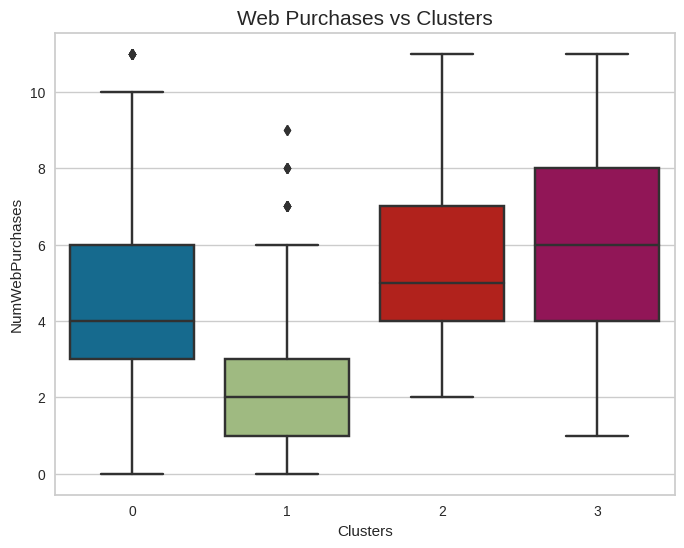

In [386]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["NumWebPurchases"])
plt.title("Web Purchases vs Clusters", size=15)
plt.show()

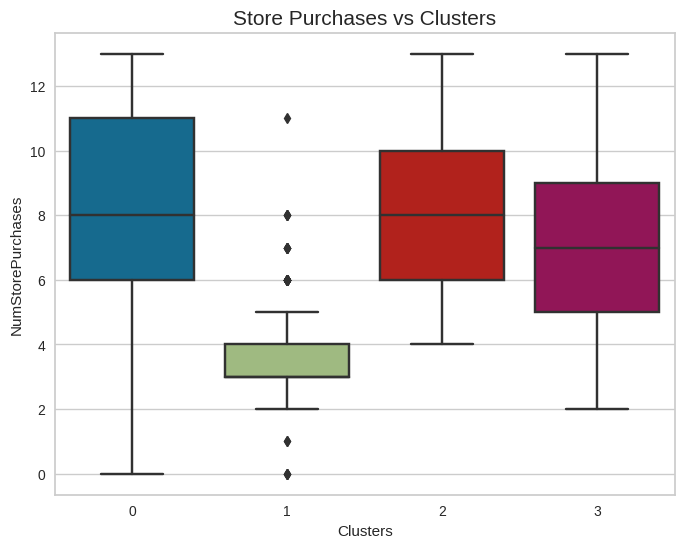

In [387]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["NumStorePurchases"])
plt.title("Store Purchases vs Clusters", size=15)
plt.show()

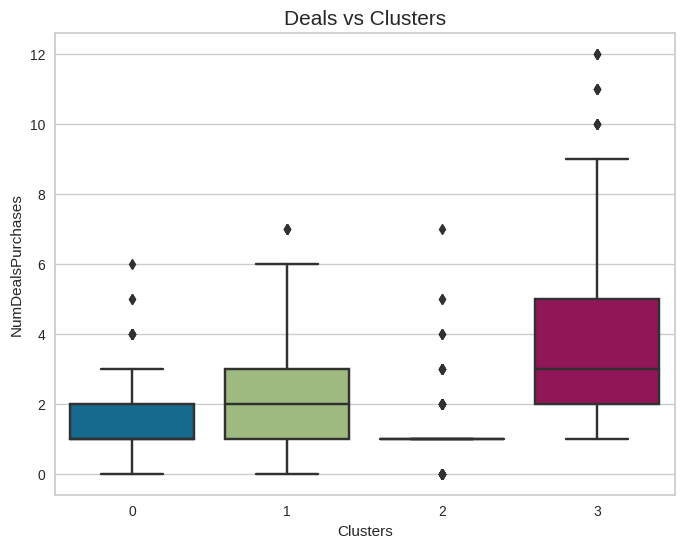

In [388]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["NumDealsPurchases"])
plt.title("Deals vs Clusters", size=15)
plt.show()

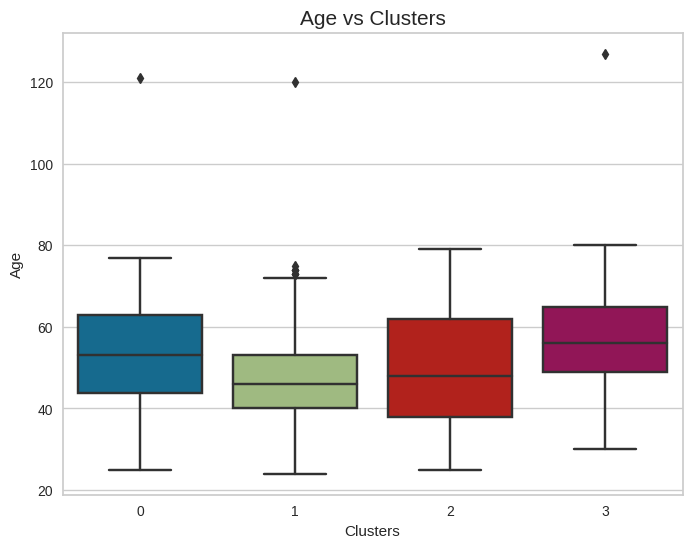

In [389]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=ds["Clusters"], y=ds["Age"])
plt.title("Age vs Clusters", size=15)
plt.show()

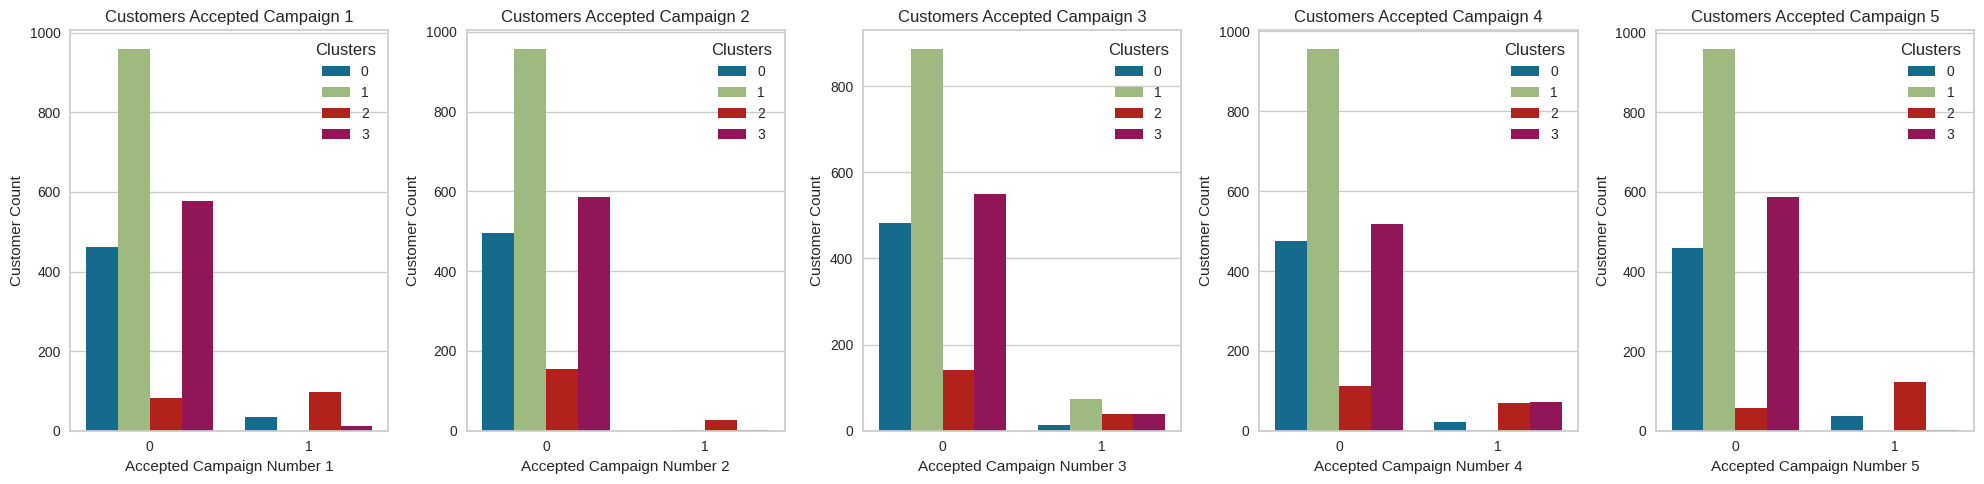

In [390]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

sns.countplot(x=ds["AcceptedCmp1"], hue=ds["Clusters"], ax=axes[0])
axes[0].set_title("Customers Accepted Campaign 1")
axes[0].set_xlabel("Accepted Campaign Number 1")
axes[0].set_ylabel("Customer Count")

sns.countplot(x=ds["AcceptedCmp2"], hue=ds["Clusters"], ax=axes[1])
axes[1].set_title("Customers Accepted Campaign 2")
axes[1].set_xlabel("Accepted Campaign Number 2")
axes[1].set_ylabel("Customer Count")

sns.countplot(x=ds["AcceptedCmp3"], hue=ds["Clusters"], ax=axes[2])
axes[2].set_title("Customers Accepted Campaign 3")
axes[2].set_xlabel("Accepted Campaign Number 3")
axes[2].set_ylabel("Customer Count")

sns.countplot(x=ds["AcceptedCmp4"], hue=ds["Clusters"], ax=axes[3])
axes[3].set_title("Customers Accepted Campaign 4")
axes[3].set_xlabel("Accepted Campaign Number 4")
axes[3].set_ylabel("Customer Count")

sns.countplot(x=ds["AcceptedCmp5"], hue=ds["Clusters"], ax=axes[4])
axes[4].set_title("Customers Accepted Campaign 5")
axes[4].set_xlabel("Accepted Campaign Number 5")
axes[4].set_ylabel("Customer Count")

plt.tight_layout()
plt.show()


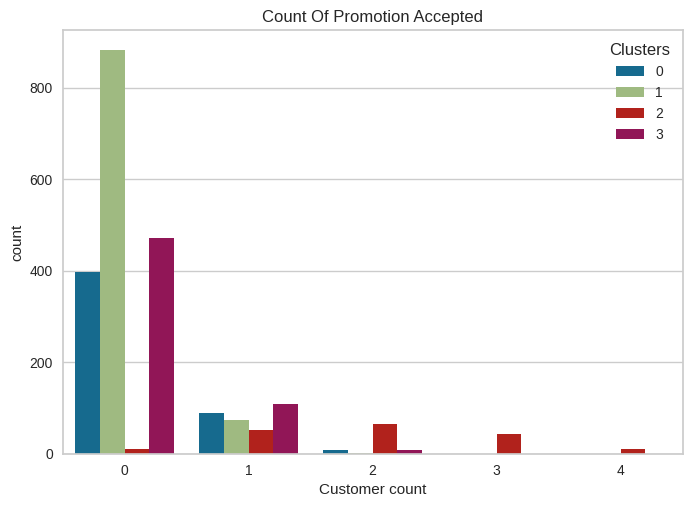

In [391]:
ds["Total_Promos"] = ds["AcceptedCmp1"]+ ds["AcceptedCmp2"]+ ds["AcceptedCmp3"]+ ds["AcceptedCmp4"]+ ds["AcceptedCmp5"]
pl = sns.countplot(x=ds["Total_Promos"],hue=ds["Clusters"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Campaigns")
pl.set_xlabel("Customer count")
plt.show()

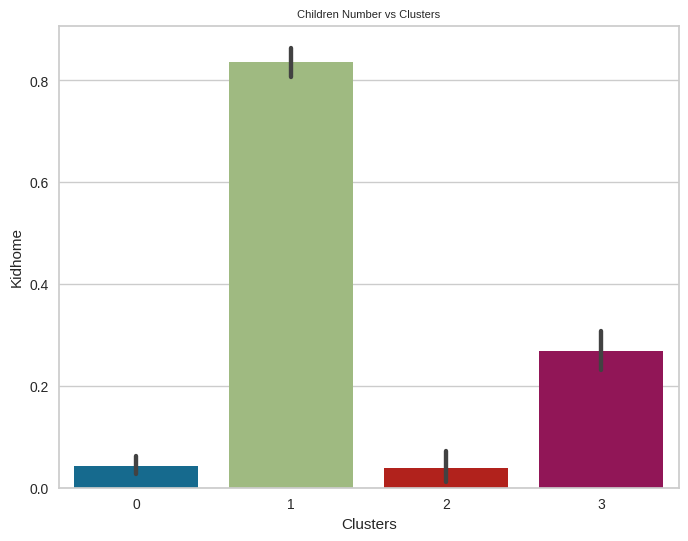

In [392]:
plt.figure(figsize=(8, 6))
sns.barplot(x=ds["Clusters"], y=ds["Kidhome"])
plt.title("Children Number vs Clusters", size=8)
plt.show()

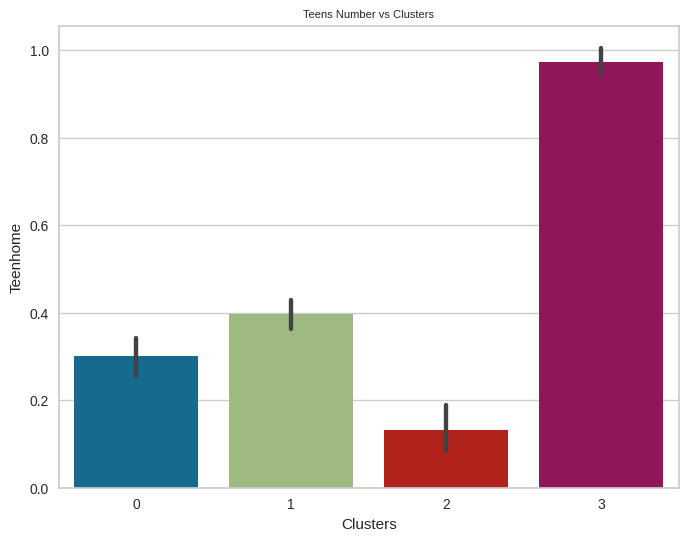

In [393]:
plt.figure(figsize=(8, 6))
sns.barplot(x=ds["Clusters"], y=ds["Teenhome"])
plt.title("Teens Number vs Clusters", size=8)
plt.show()